In [1]:
# Import Necessary packages
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import gsw #Contains some oceanography stuff => Used to calculate potential density

In [2]:
# Get necessary paths to files (example is the years 951-955)
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_annual_z_1x1deg/ts/annual/5yr/'
filename_age = 'ocean_annual_z_1x1deg.0951-0955.agessc.nc'
filename_temp = 'ocean_annual_z_1x1deg.0951-0955.thetao.nc'
filename_vol = 'ocean_annual_z_1x1deg.0951-0955.volcello.nc'
filename_so = 'ocean_annual_z_1x1deg.0951-0955.so.nc'

In [3]:
# Open the data
age = xr.open_dataset(rootdir +datadir + filename_age) # Age tracer
temp = xr.open_dataset(rootdir+datadir+filename_temp) # Temperature
vol = xr.open_dataset(rootdir+datadir+filename_vol) # Volume
so = xr.open_dataset(rootdir+datadir +filename_so) # Salinity
pot_den = gsw.density.sigma2(so.so, temp.thetao) # Potential Density with a reference pressure of 2000 dbar, which is about 2000 meters
# Unfortunately this gives us an numpy array, which we can't work with directly, we will convert this numpy array to a xarray DataArray in a later step

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [4]:
# Let's do so binning, but we need to organize the data to be able to understand this better.
dataset = xr.merge([temp, age])
dataset = xr.merge([dataset, vol])
dataset = xr.merge([dataset, so])

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/num

In [5]:
print(dataset)

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360, time: 5, z_i: 36, z_l: 35)
Coordinates:
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time        (time) object 0951-07-02 12:00:00 ... 0955-07-02 12:00:00
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Dimensions without coordinates: bnds
Data variables:
    average_DT  (time) timedelta64[ns] 365 days 365 days ... 365 days 365 days
    average_T1  (time) object 0950-05-09 00:00:00 ... 0954-05-08 00:00:00
    average_T2  (time) object 0951-05-09 00:00:00 ... 0955-05-08 00:00:00
    lat_bnds    (lat, bnds) float64 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
    lon_bnds    (lon, bnds) float64 0.0 1.0 1.0 2.0 ... 358.0 359.0 359.0 360.0
    thetao      (time, z_l, lat, lon) float32 nan nan nan nan ... na

In [6]:
# Convert numpy array to DataArray, need to state the coordinates and dimensions
#Coordinates
time = so.time
z_l = so.z_l
lat = so.lat
lon = so.lon
potden = xr.DataArray(pot_den, coords = [time, z_l, lat, lon], dims = ['time', 'z_l', 'lat', 'lon'] )

In [7]:
print(potden)

<xarray.DataArray (time: 5, z_l: 35, lat: 180, lon: 360)>
array([[[[      nan, ...,       nan],
         ...,
         [35.405302, ..., 35.406869]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [      nan, ...,       nan]]],


       ...,


       [[[      nan, ...,       nan],
         ...,
         [35.601009, ..., 35.601687]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [      nan, ...,       nan]]]])
Coordinates:
  * time     (time) object 0951-07-02 12:00:00 ... 0955-07-02 12:00:00
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5


In [9]:
potden.name = 'PotDen'

In [10]:
dataset = xr.merge([dataset, potden])

In [11]:
# Should see potential density in the dataset
print(dataset)

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360, time: 5, z_i: 36, z_l: 35)
Coordinates:
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time        (time) object 0951-07-02 12:00:00 ... 0955-07-02 12:00:00
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Dimensions without coordinates: bnds
Data variables:
    average_DT  (time) timedelta64[ns] 365 days 365 days ... 365 days 365 days
    average_T1  (time) object 0950-05-09 00:00:00 ... 0954-05-08 00:00:00
    average_T2  (time) object 0951-05-09 00:00:00 ... 0955-05-08 00:00:00
    lat_bnds    (lat, bnds) float64 -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0
    lon_bnds    (lon, bnds) float64 0.0 1.0 1.0 2.0 ... 358.0 359.0 359.0 360.0
    thetao      (time, z_l, lat, lon) float32 nan nan nan nan ... na

In [12]:
pV_age = dataset.volcello*dataset.agessc
pV_age.name = 'pV_age'
dataset = xr.merge([dataset, pV_age])

In [22]:
# Make things easier, creating a function that does binning and plotting
def binandplot(ds, var_bin, lower, upper, interval, t):
    df = ds
    df = df.set_coords(var_bin)
    bins = np.arange(lower,upper,interval)
    pV = df.pV_age.isel(time = t).groupby_bins(var_bin, bins)
    V = df.volcello.isel(time=t).groupby_bins(var_bin, bins)
    # Plotting
    pv_mean = pV.sum(xr.ALL_DIMS)/V.sum(xr.ALL_DIMS)
    pv_mean.plot()
    plt.title('Average Age with respect to ' + var_bin +' with volume weighted average for year 951')
    plt.ylabel('Age')
    plt.xlabel(var_bin)


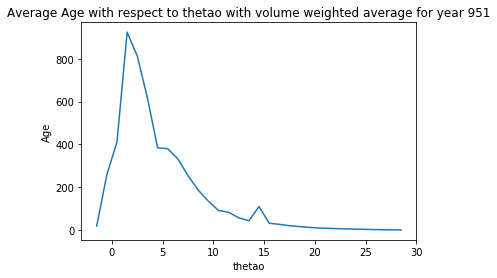

In [23]:
binandplot(dataset, 'thetao', -2, 30, 1, 0)

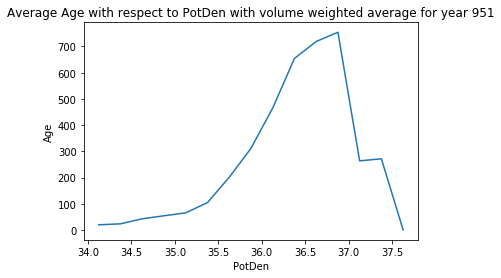

In [27]:
binandplot(dataset, 'PotDen', 34, 38, .25, 0)

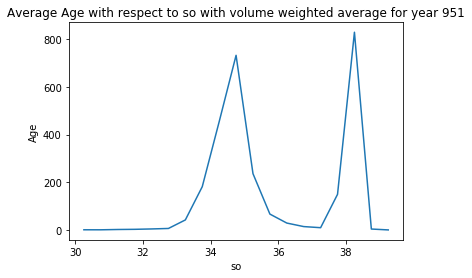

In [28]:
binandplot(dataset, 'so', 30, 40, .5, 0)

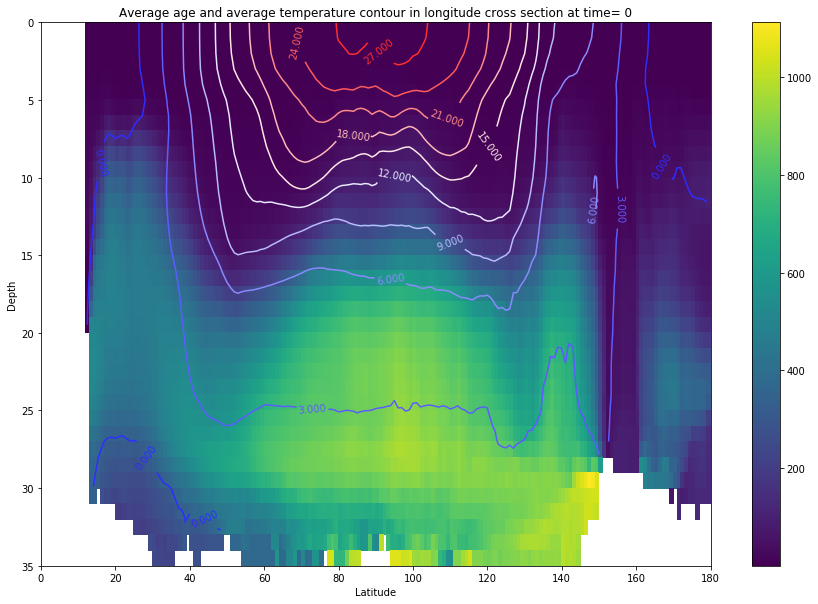

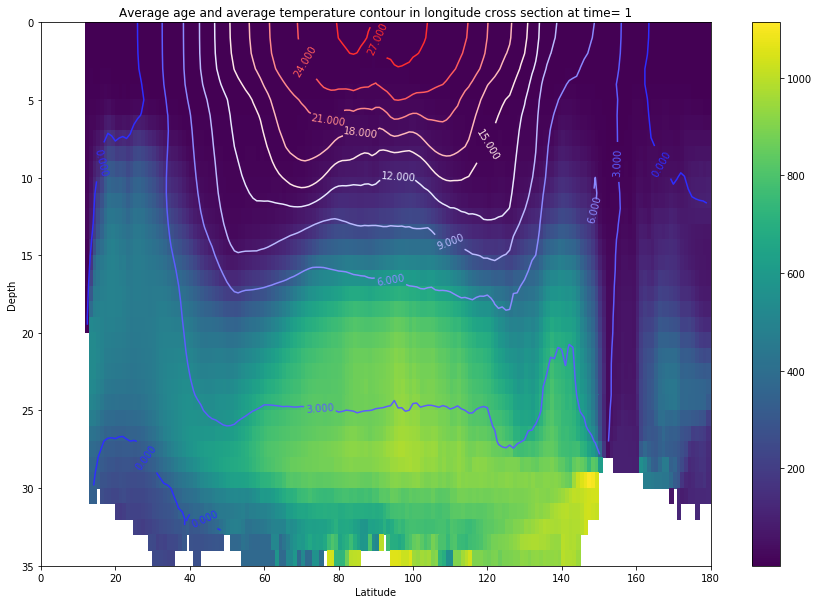

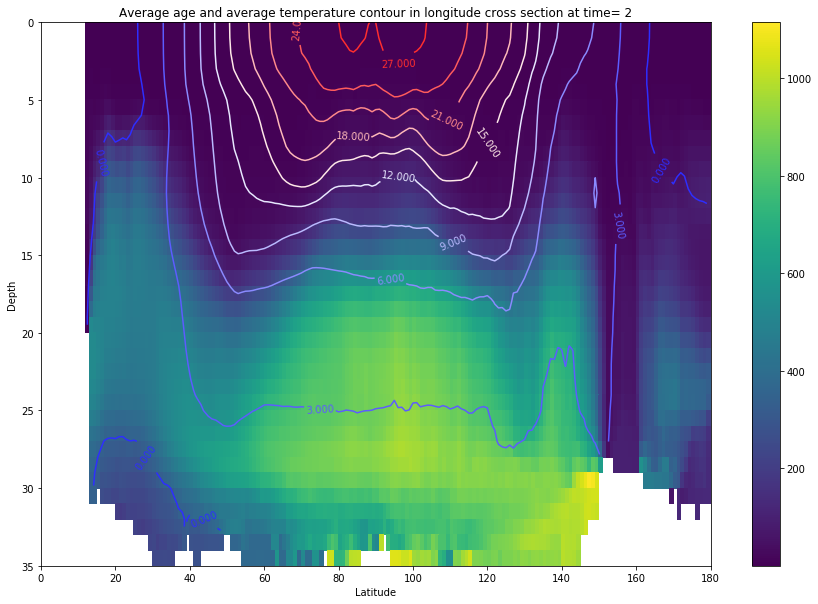

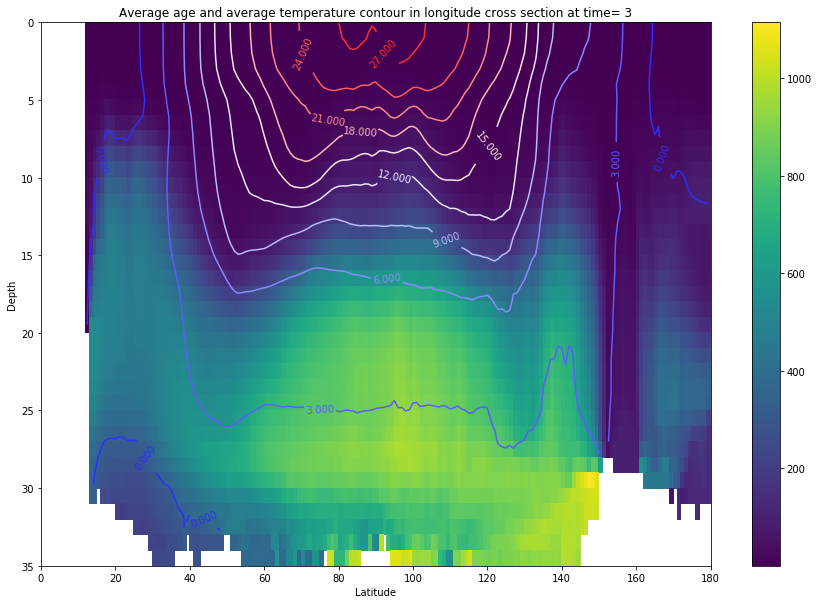

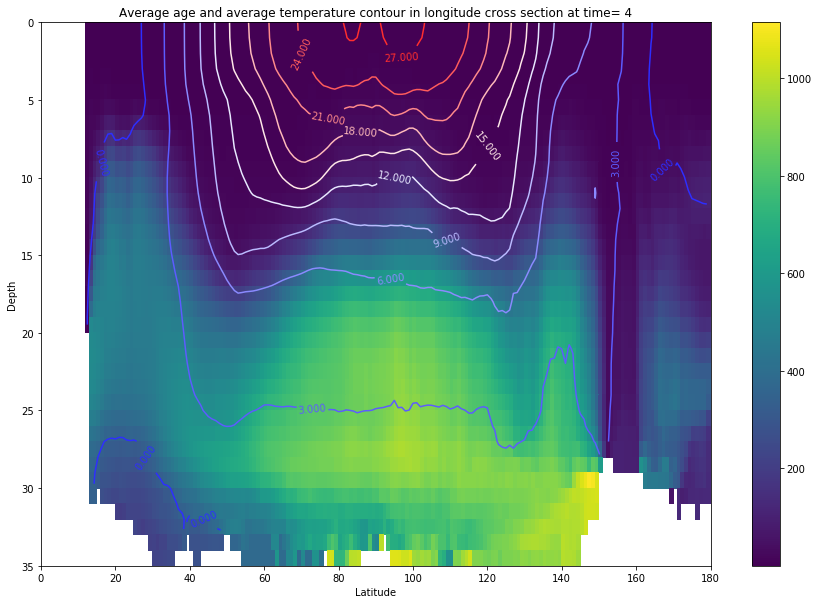

In [30]:
# Longitudinal Cross-Section with average age and temperature for annual average
age_average = age.agessc.mean('lon')
temp_average = temp.thetao.mean('lon')
for i in range(0,5):
    plt.figure(figsize = (15,10))
    im = plt.pcolormesh(age_average[i])
    a = plt.contour(temp_average[i], 10, cmap = plt.cm.bwr)
    plt.clabel(a, inline = 1, fontsize = 10)
    plt.colorbar(im)
    plt.gca().invert_yaxis()
    plt.title('Average age and average temperature contour in longitude cross section at time= ' +str(i))
    plt.xlabel('Latitude')
    plt.ylabel('Depth')
    plt.show()

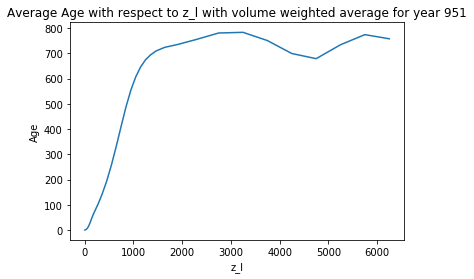

In [31]:
# Here is a representation of age with respect to temperature in terms of the levels of depth
# Make things easier, creating a function that does binning and plotting, adapting the function to allow the bins to represent an array
def binandplot1(ds, var_bin, ran, t):
    df = ds
    df = df.set_coords(var_bin)
    bins = ran
    pV = df.pV_age.isel(time = t).groupby_bins(var_bin, bins)
    V = df.volcello.isel(time=t).groupby_bins(var_bin, bins)
    # Plotting
    pv_mean = pV.sum(xr.ALL_DIMS)/V.sum(xr.ALL_DIMS)
    pv_mean.plot()
    plt.title('Average Age with respect to ' + var_bin +' with volume weighted average for year 951')
    plt.ylabel('Age')
    plt.xlabel(var_bin)
binandplot1(dataset, 'z_l', dataset.z_l, 0)

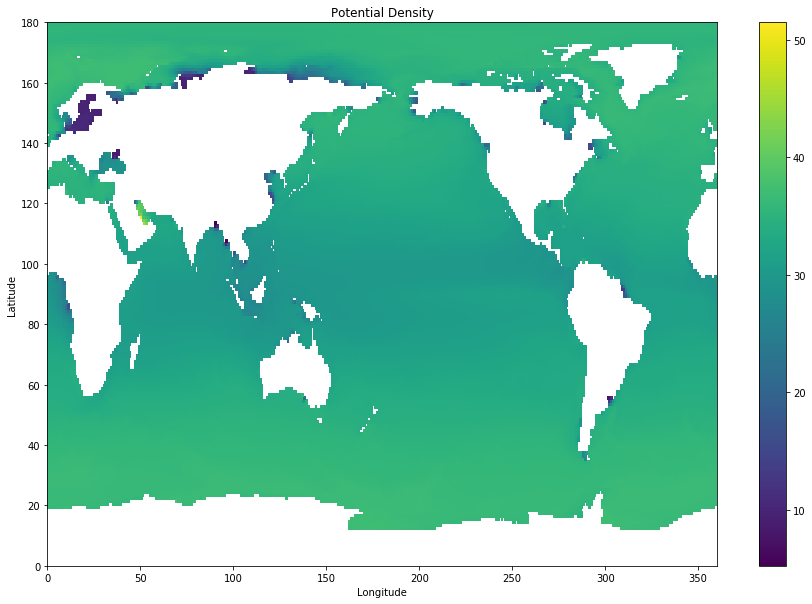

In [32]:
# Try to look at potential density in the surface layer
plt.figure(figsize = (15,10))
im = plt.pcolormesh(pot_den[0][0])
plt.colorbar(im)
plt.title('Potential Density')
# plt.gca().invert_yaxis()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

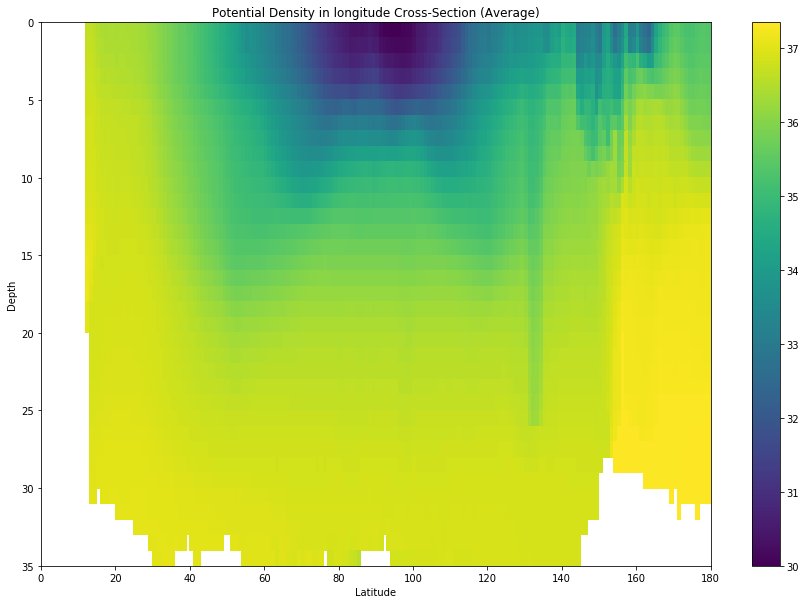

In [34]:
# Here is a longitudinal Cross Section of Potential density (reference pressure = 2000 dbar)
pot_den_long = potden.mean('lon')
plt.figure(figsize = (15,10))
im = plt.pcolormesh(pot_den_long[0])
plt.colorbar(im)
plt.title('Potential Density in longitude Cross-Section (Average)')
plt.gca().invert_yaxis()
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.show()